In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, jit

from MonteCarloTorus import RunSWAP, RandomConfig, RandomConfigSWAP, ParticlesInRegion, BoundaryMask
from FQHEWaveFunctions import LaughlinTorus
from utilities import Stats,FullStats

In [2]:
from MonteCarloSWAPTorus import RunPSWAP, RunModSWAP, RunSignSWAP, LocateParticles

In [3]:
N = 15
Ns = 15
boundary = 0.5

t = np.complex128(1j)
M = 100000
step_size = 0.05

result = RunPSWAP(N=N, Ns=Ns, t=t, M=M, step_size=step_size, boundary_dimensionless=boundary)

Torus dimensions 
Lx =  9.708129562778495 
Ly =  9.708129562778495
t(Lx)*e^(-i phi_1) = (0.9999999999999439-3.404781697868427e-14j)
t(Lx*tau)*e^(-i phi_t) = (0.9999999999999191+2.2735512966222394e-15j)
Iteration 5000 done, current acceptance ratio: 74.73 %
Iteration 10000 done, current acceptance ratio: 74.82 %
Iteration 15000 done, current acceptance ratio: 75.3 %
<NULL> 20000 <NULL> 75.17 <NULL>


In [3]:
N = 10
Ns = 10
boundary = 0.5

t = np.complex128(1j)
M = 200000
step_size = 0.13

result = RunSignSWAP(N=N, Ns=Ns, t=t, M=M, step_size=step_size, boundary_dimensionless=boundary)

Torus dimensions 
Lx =  7.926654595212022 
Ly =  7.926654595212022
t(Lx)*e^(-i phi_1) = (1.000000000000008+2.5006044198174028e-14j)
t(Lx*tau)*e^(-i phi_t) = (0.9999999999999643-8.916057149333141e-14j)
Iteration 10000 done, current acceptance ratio: 52.67 %
Iteration 20000 done, current acceptance ratio: 53.27 %
Iteration 30000 done, current acceptance ratio: 53.23 %
Iteration 40000 done, current acceptance ratio: 52.9 %
Iteration 50000 done, current acceptance ratio: 52.95 %
Iteration 60000 done, current acceptance ratio: 52.94 %
Iteration 70000 done, current acceptance ratio: 52.99 %
Iteration 80000 done, current acceptance ratio: 53.06 %
Iteration 90000 done, current acceptance ratio: 53.1 %
Iteration 100000 done, current acceptance ratio: 53.1 %
Iteration 110000 done, current acceptance ratio: 53.05 %
Iteration 120000 done, current acceptance ratio: 53.01 %
Iteration 130000 done, current acceptance ratio: 52.96 %
Iteration 140000 done, current acceptance ratio: 52.91 %
Iteration 150

Sign term

In [5]:
thermal = int(2e4)
real_mean, real_std = Stats(np.real(result[thermal:]))
print(f"N={N}, Mean: {real_mean:.6f}, Std: {real_std/np.sqrt(M-thermal):.6f}")

N=10, Mean: 0.528874, Std: 0.001328


In [6]:
thermal = int(1e5)
imag_mean, imag_std = Stats(np.imag(result[thermal:]))
print(f"N={N}, Mean: {imag_mean:.6f}, Std: {imag_std/np.sqrt(M-thermal):.6f}")

N=10, Mean: -0.004732, Std: 0.002015


In [7]:
thermal = int(5e4)
real_mean_vector, real_std_vector = FullStats(np.real(result[thermal:]))
imag_mean_vector, imag_std_vector = FullStats(np.imag(result[thermal:]))

c:\Users\crist\miniconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\crist\miniconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


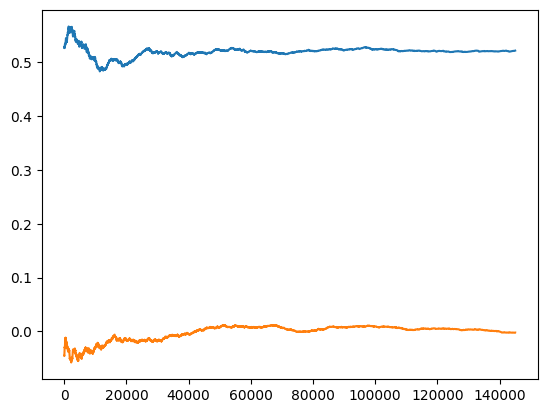

In [8]:
plt.plot(np.arange(result.size-thermal-5000),real_mean_vector[5000:])
plt.plot(np.arange(result.size-thermal-5000),imag_mean_vector[5000:])

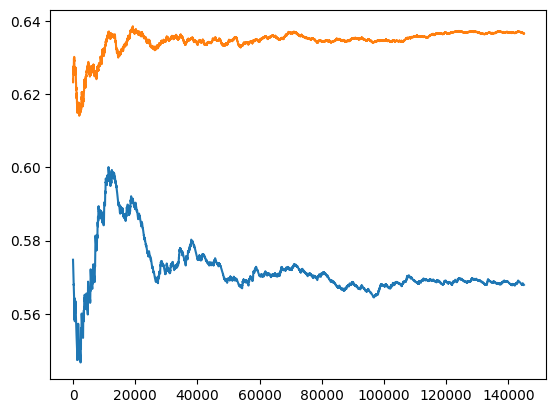

In [9]:
plt.plot(np.arange(result.size-thermal-5000),real_std_vector[5000:])
plt.plot(np.arange(result.size-thermal-5000),imag_std_vector[5000:])

Mod term

In [12]:
thermal = int(5e4)
mean, std = Stats(result[thermal:])
print(f"N={N}, Mean: {mean:.6f}, Std: {std/np.sqrt(M-thermal):.6f}")

N=10, Mean: 0.554513, Std: 0.003515


In [13]:
mean_vector, std_vector = FullStats(result[thermal:])

c:\Users\crist\miniconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\crist\miniconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


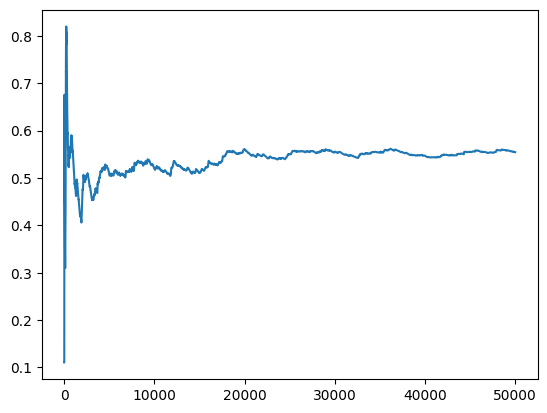

In [15]:
plt.plot(np.arange(result.size-thermal),mean_vector)

Probability term

In [7]:
mean, std = Stats(result, 50000)
print(f"N={N}, Mean: {mean:.6f}, Std: {std/np.sqrt(M-50000):.6f}")

N=10, Mean: 0.280973, Std: 0.001161


In [8]:
mean_vector, std_vector = FullStats(result[50000:])

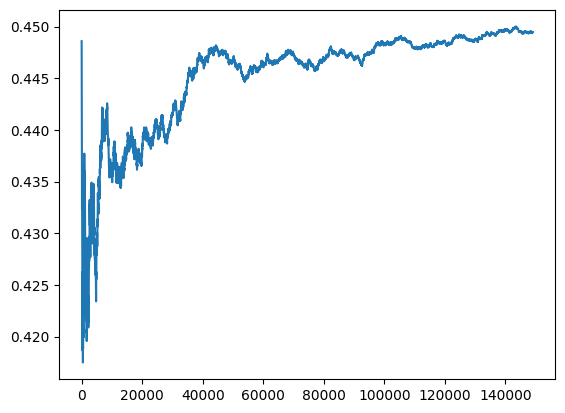

In [11]:
plt.plot(np.arange(result.size-51000),std_vector)

In [3]:
N = 10
Ns = 10
boundary = 0.5

t = np.complex128(1j)
M = 100000
step_size = 0.13
result = RunPSWAP(N=N, Ns=Ns, t=t, M=M, step_size=step_size, boundary_dimensionless=boundary)

Torus dimensions 
Lx =  7.926654595212022 
Ly =  7.926654595212022
t(Lx)*e^(-i phi_1) = (1.0000000000000147+1.9564332011998237e-14j)
t(Lx*tau)*e^(-i phi_t) = (1.000000000000011+3.166248499914299e-14j)
Iteration 5000 done, current acceptance ratio: 52.19 %
Iteration 10000 done, current acceptance ratio: 51.41 %
Iteration 15000 done, current acceptance ratio: 51.42 %
Iteration 20000 done, current acceptance ratio: 51.26 %
Iteration 25000 done, current acceptance ratio: 51.14 %
Iteration 30000 done, current acceptance ratio: 51.14 %
Iteration 35000 done, current acceptance ratio: 51.18 %
Iteration 40000 done, current acceptance ratio: 51.09 %
Iteration 45000 done, current acceptance ratio: 51.24 %
Iteration 50000 done, current acceptance ratio: 51.44 %
Iteration 55000 done, current acceptance ratio: 51.41 %
Iteration 60000 done, current acceptance ratio: 51.39 %
Iteration 65000 done, current acceptance ratio: 51.32 %
Iteration 70000 done, current acceptance ratio: 51.38 %
Iteration 75000 

In [4]:
mean, std = Stats(result, 10000)
print(f"N={N}, Mean: {mean:.6f}, Std: {std/np.sqrt(M-10000):.6f}")

N=10, Mean: 0.277522, Std: 0.001493


In [3]:
N = 5

Lx = 6
Ly = 6
print(Lx,Ly)
region = np.array([0,1,0,0.5])
region_scaled = np.array([region[0]*Lx, region[1]*Lx,
                              region[2]*Ly, region[3]*Ly])

R = RandomConfigSWAP(N,Lx,Ly, region_scaled)
R

6 6


array([[3.13432114+3.71488359j, 3.81530061+3.7865351j ],
       [4.44889506+2.12563927j, 0.41755753+1.62701324j],
       [3.02701878+2.05328682j, 4.04229657+3.37621711j],
       [1.68762098+3.6703799j , 4.49424582+1.56448815j],
       [4.24986147+3.90343389j, 0.78206924+3.31739714j]])

In [4]:
N = 10
Ns = 10
region = np.array([0,1,0,0.5])

t = np.complex128(1j)
M = 100000
step_size = 0.025
result = RunSWAP(N=N, Ns=Ns, t=t, M=M, step_size=step_size, term="mod", region=region)

Torus dimensions 
Lx =  7.926654595212022 
Ly =  7.926654595212022
t(Lx)*e^(-i phi_1) = (1.0000000000000275+2.252348720521357e-14j)
t(Lx*tau)*e^(-i phi_t) = (1.000000000000109-8.19030766567528e-14j)


KeyboardInterrupt: 

In [10]:
mean, std = Stats(result, 10000)
print(f"N={N}, Mean: {mean:.6f}, Std: {std/np.sqrt(M-10000):.6f}")

N=10, Mean: 0.272133+0.000000j, Std: 0.001484


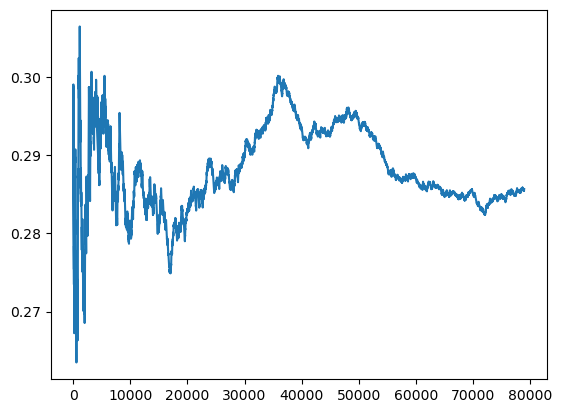

In [10]:
mean_vector, std_vector = FullStats(all_values[20000:])
plt.plot(np.arange(mean_vector.size), mean_vector)